In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
def windmill(n,k):
    s = nx.star_graph(n)
    kg = nx.complete_graph(k)
    s_k = nx.cartesian_product(s,kg)
    s_k.remove_nodes_from([(0,i) for i in range(1,k)])
    for i in range(1,n+1):
        for j in range(k):
            s_k.add_edge((0,0),(i,j))
    s_k = nx.convert_node_labels_to_integers(s_k)
    return s_k

In [ ]:
windmill()

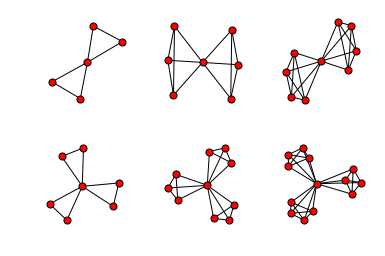

In [3]:
plt.subplot(231)
k = 1
for j in range(2,4):
    for i in range(2,5):
        plt.subplot(2,3,k)
        nx.draw(windmill(j,i),node_size=50,label="W(%d,%d)%(i,j)")
        k+=1
        

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100]

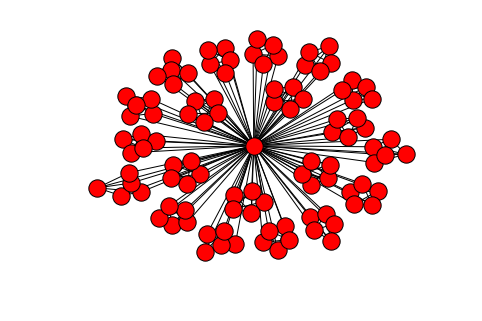

In [4]:
g = windmill(20,5)
adj_spec = np.array(nx.adjacency_spectrum(g))
lap_spec = np.array(nx.laplacian_spectrum(g))
adj_spec.sort() 
lap_spec.sort()
landa = lap_spec[-1]
alg   = lap_spec[1]
g = nx.convert_node_labels_to_integers(g)
nx.draw_spring(g,with_label=True)
g.nodes()

In [6]:
A = nx.adj_matrix(g).todense()
np.savetxt('winmill',A)

In [23]:
nx.write_adjlist(g,'windmill1')

In [14]:
print "n            %d"%(g.number_of_nodes())
print "m            %d"%(g.number_of_edges())
print "Avg C        %f"%(nx.cluster.average_clustering(g))
print "C            %f"%(nx.transitivity(g))
print "((Avg C) /C) %f"%(nx.cluster.average_clustering(g)/nx.transitivity(g))
print "landa        %f"%(landa)
print "K_max        %f"%(max(g.degree().values()))
print "Q            %f"%(alg/landa)

n            101
m            300
Avg C        0.990499
C            0.201681
((Avg C) /C) 4.911224
landa        101.000000
K_max        100.000000
Q            0.009901


In [4]:
g = windmill(33,7)
adj_spec = np.array(nx.adjacency_spectrum(g))
lap_spec = np.array(nx.laplacian_spectrum(g))
adj_spec.sort() 
lap_spec.sort()
landa = lap_spec[-1]
alg   = lap_spec[1]

In [5]:
print "n            %d"%(g.number_of_nodes())
print "m            %d"%(g.number_of_edges())
print "Avg C        %f"%(nx.cluster.average_clustering(g))
print "C            %f"%(nx.transitivity(g))
print "((Avg C) /C) %f"%(nx.cluster.average_clustering(g)/nx.transitivity(g))
print "landa        %f"%(landa)
print "K_max        %f"%(max(g.degree().values()))
print "Q            %f"%(alg/landa)

n            232
m            924
Avg C        0.995802
C            0.176471
((Avg C) /C) 5.642879
landa        232.000000
K_max        231.000000
Q            0.004310


In [6]:
itr = 10000
Q = np.zeros(itr)
C = np.zeros(itr)
ers = []
algs = np.zeros(itr)
for i in range(itr):
    er = nx.random_graphs.erdos_renyi_graph(100,0.05)
    ers.append(er)
    lap_spec = np.array(nx.laplacian_spectrum(er))
    landa = lap_spec[-1]
    alg   = lap_spec[1]
    algs[i] = alg
    Q[i]  = alg/landa
    C[i]  = nx.cluster.average_clustering(er)/nx.transitivity(er)

          2
-0.01955 x + 0.0461 x - 0.001914


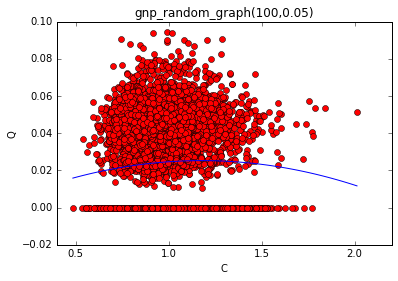

In [7]:
plt.plot(C,Q,'ro')
co = np.polyfit(C,Q,2)
p = np.poly1d(co)
x = np.linspace(C.min(),C.max(),100)
plt.plot(x,p(x))
plt.ylabel('Q')
plt.xlabel('C')
plt.title(er.name)
print p

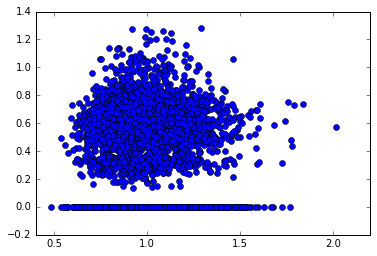

In [8]:
plt.plot(C,algs,'bo')

In [9]:
Q1 = np.zeros(itr)
C1 = np.zeros(itr)
bas = []
for i in range(itr):
    ba = nx.random_graphs.barabasi_albert_graph(100,2)
    bas.append(ba)
    lap_spec = np.array(nx.laplacian_spectrum(ba))
    landa = lap_spec[-1]
    alg   = lap_spec[1]
    Q1[i]  = alg/landa
    C1[i]  = nx.cluster.average_clustering(ba)/nx.transitivity(ba)

In [10]:
Q1.argmax()

327

In [11]:
Q1[2742]

0.017418453339439154

In [12]:
C1[2742]

3.1855897156374842

           2
0.0001247 x - 0.004766 x + 0.03396


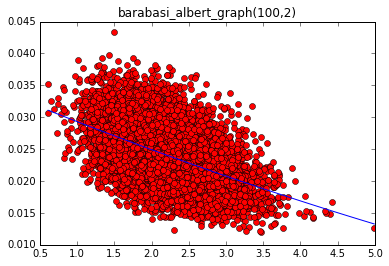

In [13]:
plt.plot(C1,Q1,'ro')
co = np.polyfit(C1,Q1,2)
p = np.poly1d(co)
x = np.linspace(C1.min(),C1.max(),100)
plt.plot(x,p(x))
plt.title(ba.name)
print p

In [14]:
Q2 = np.zeros(itr)
C2 = np.zeros(itr)
for i in range(itr):
    ws = nx.random_graphs.watts_strogatz_graph(100,4,0.05)
    lap_spec = np.array(nx.laplacian_spectrum(ws))
    landa2 = lap_spec[-1]
    alg2   = lap_spec[1]
    Q2[i]  = alg2/landa2
    C2[i]  = nx.cluster.average_clustering(ws)/nx.transitivity(ws)

         2
0.04479 x - 0.0005274 x - 0.03807


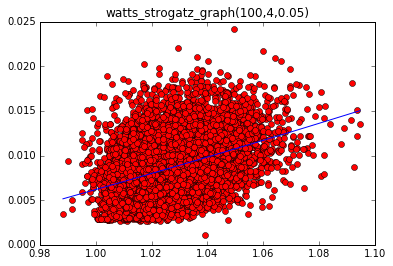

In [15]:
plt.plot(C2,Q2,'ro')
co = np.polyfit(C2,Q2,2)
p = np.poly1d(co)
x = np.linspace(C2.min(),C2.max(),100)
plt.plot(x,p(x))
plt.title(ws.name)
print p

In [16]:
C1    = np.zeros(72)
Cavg1 = np.zeros(72)
for i in range(72):
    ws = nx.random_graphs.watts_strogatz_graph(100,4,(i + 1)/100.0)
    Cavg1[i] = nx.cluster.average_clustering(ws)
    C1[i]    = nx.transitivity(ws)

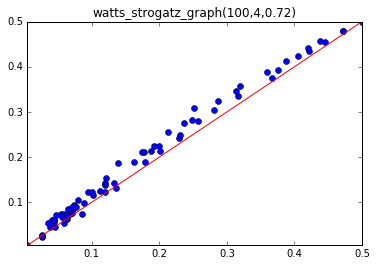

In [17]:
plt.plot(C1,Cavg1,'bo')
x = np.linspace(0,1)
plt.xlim(C1.min(),C1.max())
plt.ylim(Cavg1.min(),Cavg1.max())
plt.plot(x,x,'r')
plt.title(ws.name)

In [18]:
C2    = np.zeros(72)
Cavg2 = np.zeros(72)
for i in range(72):
    ba = nx.random_graphs.barabasi_albert_graph(100,np.random.randint(1,6))
    Cavg2[i] = nx.cluster.average_clustering(ba)
    C2[i]    =  nx.transitivity(ba)

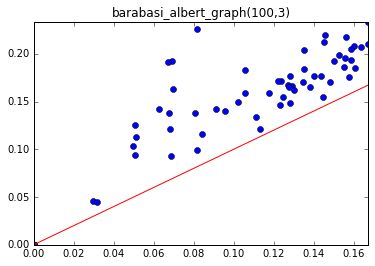

In [19]:
plt.plot(C2,Cavg2,'bo')
x = np.linspace(0,1)
plt.xlim(C2.min(),C2.max())
plt.ylim(Cavg2.min(),Cavg2.max())
plt.plot(x,x,'r')
plt.title(ba.name)

In [20]:
C    = np.zeros(72)
Cavg = np.zeros(72)
for i in range(72):
    er = nx.random_graphs.erdos_renyi_graph(100,(i+1)/72.0)
    Cavg[i] = nx.cluster.average_clustering(er)
    C[i]    = nx.transitivity(er)

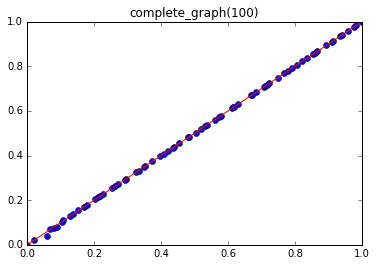

In [21]:
plt.plot(C,Cavg,'bo')
x = np.linspace(0,1)
plt.xlim(C.min(),C.max())
plt.ylim(Cavg.min(),Cavg.max())
plt.plot(x,x,'r')
plt.title(er.name)

In [249]:
class optimizeCbarPerC():
    def __init__(self , g , p, alp):
        self.p               = p;
        self.g               = g.copy();
        self.g_c             = nx.complement(self.g);
        self.number_of_edges = self.g.number_of_edges();
        self.m               = int(self.p * self.number_of_edges)
        self.alp             = alp
        
        
    def alpha(self , g , edge, op='add'):
        if op == 'add':
            g.add_edge(*edge)
            lap_spec = np.array(nx.laplacian_spectrum(g))
            lap_spec.sort()
            landa = lap_spec[-1]
            alg   = lap_spec[1]
            C = self.alp*np.abs(nx.cluster.average_clustering(g)/nx.transitivity(g) - 1) + (1-self.alp)*(landa/alg) + nx.diameter(g)
            g.remove_edge(*edge)
            
        else:
            g.remove_edge(*edge)
            lap_spec = np.array(nx.laplacian_spectrum(g))
            lap_spec.sort()
            landa = lap_spec[-1]
            alg   = lap_spec[1]
            C = self.alp*np.abs(nx.cluster.average_clustering(g)/nx.transitivity(g) - 1) + (1-self.alp)*(landa/alg) + nx.diameter(g)
            g.add_edge(*edge)
        return C
        
        
    def OptimizeAlgebraicSydneyFirstAdd(self):
        g_co = self.g.copy()
        g_co_c = self.g_c.copy()
        rmv_edgs = np.array(g_co.edges()   , dtype='int32')
        add_edgs = np.array(g_co_c.edges() , dtype='int32')

        j=0
        while ((j < self.m) and (j < rmv_edgs.shape[0]) and (j < add_edgs.shape[0])):
            alpha_remove = np.zeros(rmv_edgs.shape[0])   # array for remove edge alpha 
            alpha_add    = np.zeros(add_edgs.shape[0])   # array for add edge alpha

            i = 0
            for rmv_edge in rmv_edgs:
                alpha_remove[i] = self.alpha(g_co , rmv_edge,'rm')
                i+=1
            
            i = 0
            for add_edge in add_edgs:
                alpha_add[i] = self.alpha(g_co , add_edge)
                i+=1

            idx_add    = np.argmin(alpha_add)    # index for edge with maximum alpha
            idx_remove = np.argmin(alpha_remove) # index for edge with minimum alpha

            max_add_edge = add_edgs[idx_add]     # edge with maximum alpha
            min_rmv_edge = rmv_edgs[idx_remove]  # edge with minimum alpha

            g_co.add_edge(*max_add_edge)
            g_co.remove_edge(*min_rmv_edge)

            if not(nx.is_connected(g_co)):
                g_co.add_edge(*min_rmv_edge)
                g_co.remove_edge(*max_add_edge)
                j-=1

            rmv_edgs = rmv_edgs[np.setdiff1d(np.arange(0,rmv_edgs.shape[0]) , idx_remove)]
            add_edgs = add_edgs[np.setdiff1d(np.arange(0,add_edgs.shape[0]) , idx_add   )]    
            j+=1
        return g_co
    
    
    
    def evalute_graph(self,func = 'OptimizeAlgebraicSydneyFirstRmv'):
        g_co = getattr(self,func)()
        L = nx.laplacian_matrix(g_co).todense()
        return self.compute_Algebraic_connectivity(L) , g_co

In [250]:
g = nx.barabasi_albert_graph(50,2)

In [111]:
C = optimizeCbarPerC(g,0.3,0.5)
gc = C.OptimizeAlgebraicSydneyFirstAdd()

In [112]:
nx.is_connected(g)

True

In [113]:
nx.is_connected(gc)

True

In [114]:
nx.cluster.average_clustering(g)/nx.transitivity(g)

2.407150183150183

In [115]:
nx.cluster.average_clustering(gc)/nx.transitivity(gc)

0.9757566137566136

In [116]:
lap_spec = np.array(nx.laplacian_spectrum(g))
lap_spec.sort()
landa = lap_spec[-1]
alg   = lap_spec[1]

In [117]:
alg/landa

0.031168263450906654

In [118]:
lap_spec = np.array(nx.laplacian_spectrum(gc))
lap_spec.sort()
landa = lap_spec[-1]
alg   = lap_spec[1]
alg/landa

0.088023460532768688

In [251]:
def attack(g,p=0.5):
    N = g.number_of_nodes()
    nAttack = int(p*N)
    nodes = g.nodes()
    Anodes = np.random.choice(nodes, nAttack , replace = False)
    Avgsh = np.zeros(nAttack + 1)
    Avgsh[0] = nx.average_shortest_path_length(g)
    i = 1
    for node in Anodes:
        g.remove_node(node)
        if not(nx.is_connected(g)):
            Gc = max(nx.connected_component_subgraphs(g), key=len)
            if len(Gc)!=0:
                Avgsh[i] = nx.average_shortest_path_length(Gc)
        else:
            Avgsh[i] = nx.average_shortest_path_length(g)
        i+=1
    return Avgsh

In [252]:
def attackd(g,p=0.5):
    N = g.number_of_nodes()
    nAttack = int(p*N)
    nodes = g.nodes()
    Anodes = np.random.choice(nodes,nAttack-1,replace=False)
    Avgsh = np.zeros(nAttack)
    Avgsh[0] = nx.diameter(g)
    i = 1
    for node in Anodes:
        g.remove_node(node)
        if not(nx.is_connected(g)):
            Gc = max(nx.connected_component_subgraphs(g), key=len)
            if len(Gc)!=0:
                Avgsh[i] = nx.diameter(Gc)
            
        else:
            Avgsh[i] = nx.diameter(g)
        i+=1
    return Avgsh

In [253]:
g = nx.barabasi_albert_graph(50,2)
nx.algebraic_connectivity(g)

0.68617122039714951

In [254]:
C = optimizeCbarPerC(g,0.3,0.5)
gc = C.OptimizeAlgebraicSydneyFirstAdd()
nx.algebraic_connectivity(gc)

0.93472458620185528

In [255]:
a3 = attackd(g)
a4 = attackd(gc)

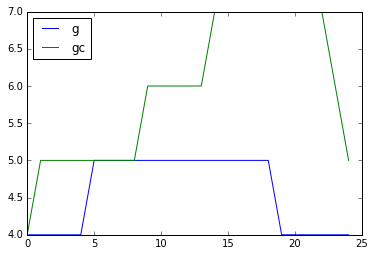

In [256]:
plt.plot(a3,label = 'g')
plt.plot(a4,label = 'gc' )
plt.legend(loc = 'upper left')

In [233]:
a1 = attack(g,0.5)

In [234]:
a2 = attack(gc)

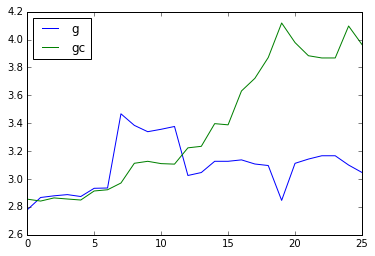

In [236]:
plt.plot(a1,label = 'g')
plt.plot(a2,label = 'gc' )
plt.legend(loc = 'upper left')

In [ ]:
n

In [7]:
g = windmill(3,4)
g.number_of_edges()

30

In [8]:
g1 = windmill(2,6)
g1.number_of_edges()

42

In [54]:
ba = nx.barabasi_albert_graph(20,2)
A = nx.adj_matrix(ba).todense()
np.savetxt(ba.name,A)

In [55]:
ba = nx.barabasi_albert_graph(50,2)
A = nx.adj_matrix(ba).todense()
np.savetxt(ba.name,A)

In [56]:
ba = nx.random_graphs.erdos_renyi_graph(20,0.05)
A = nx.adj_matrix(ba).todense()
np.savetxt(ba.name,A)

In [57]:
ba = nx.random_graphs.erdos_renyi_graph(50,0.05)
A = nx.adj_matrix(ba).todense()
np.savetxt(ba.name,A)

In [58]:
ba = nx.random_graphs.watts_strogatz_graph(20,4,0.05)
A = nx.adj_matrix(ba).todense()
np.savetxt(ba.name,A)

In [79]:
ba = nx.random_graphs.watts_strogatz_graph(50,4,0.05)
A = nx.adj_matrix(ba).todense()
np.savetxt(ba.name,A)

In [61]:
ba = nx.waxman_graph(20)
A = nx.adj_matrix(ba).todense()
np.savetxt('waxman_graph_20',A)

In [62]:
ba = nx.waxman_graph(50)
A = nx.adj_matrix(ba).todense()
np.savetxt('waxman_graph_50',A)

In [71]:
g = windmill(3,6)
A = nx.adj_matrix(g).todense()
np.savetxt("windmill_19",A)

In [74]:
g = windmill(5,10)
A = nx.adj_matrix(g).todense()
np.savetxt("windmill_5_10",A)

In [77]:
g = nx.random_geometric_graph(20,0.1)
A = nx.adj_matrix(g).todense()
np.savetxt(g.name + '20',A)

In [78]:
g = nx.random_geometric_graph(50,0.1)
A = nx.adj_matrix(g).todense()
np.savetxt(g.name + '50',A)